In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

df_ceny: pd.DataFrame = pd.read_csv("PL_CENY_NIEZB_RB_20230301_20230331_20230514120846.csv", sep=";", decimal=",")
df_zapotrzebowanie: pd.DataFrame = pd.read_csv("PL_WYK_KSE_20230301_20230331_20230401010553.csv", encoding="cp1250", sep=";", decimal=",")

In [3]:
df_ceny["Data_i_Godzina"] = df_ceny["Data"].astype(str) + " - " + df_ceny["Godzina"].astype(str)
df_ceny

,Data,Godzina,CRO,CROs,CROz,Stan zakontraktowania,Niezbilansowanie,Data_i_Godzina
0,20230301,1,610.02,610.02,610.02,-817.06,-1252.34,20230301 - 1
1,20230301,2,609.99,609.99,609.99,-788.99,-1037.82,20230301 - 2
2,20230301,3,598.19,598.19,598.19,-614.78,-829.30,20230301 - 3
3,20230301,4,598.19,598.19,598.19,-624.78,-835.04,20230301 - 4
4,20230301,5,606.74,606.74,606.74,-691.05,-894.82,20230301 - 5
...,...,...,...,...,...,...,...,...
738,20230331,20,726.93,726.93,726.93,214.81,0.84,20230331 - 20
739,20230331,21,728.48,728.48,728.48,4.32,-392.52,20230331 - 21
740,20230331,22,712.46,712.46,712.46,36.69,107.96,20230331 - 22
741,20230331,23,650.00,650.00,650.00,-441.46,-359.91,20230331 - 23


In [4]:
df_zapotrzebowanie["Data_i_Godzina"] = df_zapotrzebowanie["Data"].astype(str) + " - " + df_zapotrzebowanie["Godzina"].astype(str)
df_zapotrzebowanie["Dzień tygodnia"] = df_zapotrzebowanie["Data"].astype(str).apply(lambda x: pd.Timestamp(x).day_of_week)
df_zapotrzebowanie

,Data,Godzina,Krajowe zapotrzebowanie na moc,Sumaryczna generacja JWCD,Sumaryczna generacja nJWCD,Krajowe saldo wymiany międzysystemowej równoległej,Krajowe saldo wymiany międzysystemowej nierównoległej,Data_i_Godzina,Dzień tygodnia
0,2023-03-01,1,18660.738,11791.263,6778.613,-541.313,943.925,2023-03-01 - 1,2
1,2023-03-01,2,18228.975,11688.688,6698.250,-777.738,943.900,2023-03-01 - 2,2
2,2023-03-01,3,17926.850,11394.838,6691.638,-748.513,943.950,2023-03-01 - 3,2
3,2023-03-01,4,18022.550,11420.475,6633.788,-620.525,943.875,2023-03-01 - 4,2
4,2023-03-01,5,18349.113,11615.638,6570.650,-422.775,943.663,2023-03-01 - 5,2
...,...,...,...,...,...,...,...,...,...
738,2023-03-31,20,22159.388,13384.850,6113.800,1721.963,944.025,2023-03-31 - 20,4
739,2023-03-31,21,22176.663,13633.538,5978.275,1624.900,944.388,2023-03-31 - 21,4
740,2023-03-31,22,20811.538,12482.400,6053.025,1338.438,944.675,2023-03-31 - 22,4
741,2023-03-31,23,19257.738,11455.988,6210.875,666.375,944.775,2023-03-31 - 23,4


<AxesSubplot:xlabel='Data_i_Godzina'>

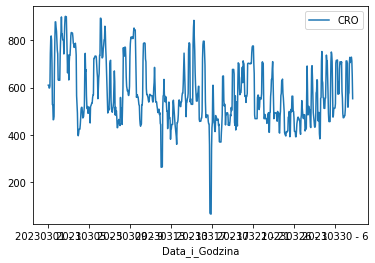

In [5]:
df_ceny.plot("Data_i_Godzina", "CRO")

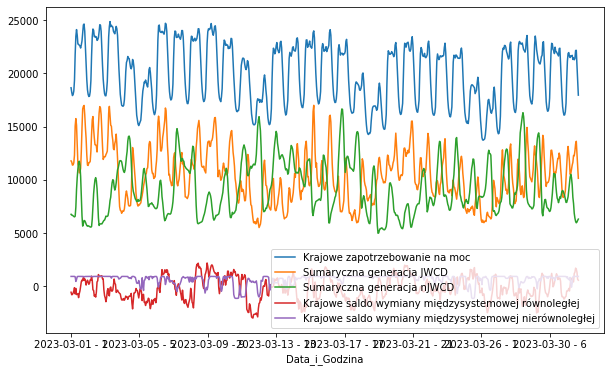

In [14]:
df_zapotrzebowanie.plot("Data_i_Godzina", ["Krajowe zapotrzebowanie na moc", "Sumaryczna generacja JWCD", "Sumaryczna generacja nJWCD", 
                                           "Krajowe saldo wymiany międzysystemowej równoległej", 
                                           "Krajowe saldo wymiany międzysystemowej nierównoległej"], figsize=(10, 6))
plt.legend(loc="lower right")
plt.show()

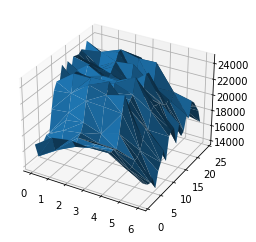

In [7]:
# X, Y = np.meshgrid(df_zapotrzebowanie["Dzień tygodnia"], df_zapotrzebowanie["Godzina"])
ax = plt.figure().add_subplot(projection='3d')
ax.plot_trisurf(df_zapotrzebowanie["Dzień tygodnia"], df_zapotrzebowanie["Godzina"], df_zapotrzebowanie["Krajowe zapotrzebowanie na moc"], linewidth=0.2)
plt.show()

In [8]:
df_pogoda: pd.DataFrame = pd.read_csv("k_d_t_03_2023.csv", encoding="cp1250", parse_dates=[[2, 3, 4]], header=None)
df_pogoda = df_pogoda.set_axis(["Data", "Kod stacji", "Nazwa", "Temperatura", "Status temp", "Wilgotność", "Status wil",
                    "Prędkość wiatru", "Status pr", "Zachmurzenie", "Status zach"], axis=1)
df_pogoda

,Data,Kod stacji,Nazwa,Temperatura,Status temp,Wilgotność,Status wil,Prędkość wiatru,Status pr,Zachmurzenie,Status zach
0,2023-03-01,249180010,PSZCZYNA,-0.6,NaN,0.0,8.0,0.7,NaN,5.0,NaN
1,2023-03-02,249180010,PSZCZYNA,1.0,NaN,0.0,8.0,1.0,NaN,2.7,NaN
2,2023-03-03,249180010,PSZCZYNA,-1.1,NaN,0.0,8.0,1.0,NaN,6.3,NaN
3,2023-03-04,249180010,PSZCZYNA,-0.4,NaN,0.0,8.0,3.7,NaN,6.0,NaN
4,2023-03-05,249180010,PSZCZYNA,0.4,NaN,0.0,8.0,1.7,NaN,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1607,2023-03-27,254220090,OLECKO,1.6,NaN,0.0,8.0,0.0,8.0,7.7,NaN
1608,2023-03-28,254220090,OLECKO,-2.2,NaN,0.0,8.0,0.0,8.0,5.7,NaN
1609,2023-03-29,254220090,OLECKO,-0.6,NaN,0.0,8.0,0.0,8.0,2.0,NaN
1610,2023-03-30,254220090,OLECKO,4.8,NaN,0.0,8.0,0.0,8.0,7.7,NaN


In [9]:
important_columns = ["Status temp", "Status pr"]
for col_name in important_columns:
    print(df_pogoda[col_name].notna().sum())

31
372


In [10]:
df_pogoda_filter = df_pogoda.loc[(df_pogoda["Status temp"] != 8.0) & (df_pogoda["Status pr"] != 8.0)]
df_pogoda_filter

,Data,Kod stacji,Nazwa,Temperatura,Status temp,Wilgotność,Status wil,Prędkość wiatru,Status pr,Zachmurzenie,Status zach
0,2023-03-01,249180010,PSZCZYNA,-0.6,NaN,0.0,8.0,0.7,NaN,5.0,NaN
1,2023-03-02,249180010,PSZCZYNA,1.0,NaN,0.0,8.0,1.0,NaN,2.7,NaN
2,2023-03-03,249180010,PSZCZYNA,-1.1,NaN,0.0,8.0,1.0,NaN,6.3,NaN
3,2023-03-04,249180010,PSZCZYNA,-0.4,NaN,0.0,8.0,3.7,NaN,6.0,NaN
4,2023-03-05,249180010,PSZCZYNA,0.4,NaN,0.0,8.0,1.7,NaN,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1576,2023-03-27,254200080,LIDZBARK WARMIŃSKI,1.5,NaN,79.3,NaN,4.3,NaN,6.3,NaN
1577,2023-03-28,254200080,LIDZBARK WARMIŃSKI,-1.6,NaN,84.3,NaN,5.0,NaN,8.0,NaN
1578,2023-03-29,254200080,LIDZBARK WARMIŃSKI,1.0,NaN,63.3,NaN,1.7,NaN,2.0,NaN
1579,2023-03-30,254200080,LIDZBARK WARMIŃSKI,7.3,NaN,68.3,NaN,3.0,NaN,8.0,NaN


In [11]:
df_pogoda_srednia = df_pogoda_filter[["Data", "Temperatura", "Prędkość wiatru"]]
df_pogoda_srednia = df_pogoda_srednia.groupby("Data").mean().reset_index()
df_pogoda_srednia.set_index("Data", inplace=True)
df_pogoda_srednia

,Temperatura,Prędkość wiatru
Data,,
2023-03-01,-1.3025,1.2800
2023-03-02,-0.7300,1.2025
2023-03-03,-1.0300,2.6750
2023-03-04,0.1975,4.3250
2023-03-05,-1.3400,2.5325
2023-03-06,-0.7475,2.0650
2023-03-07,0.3150,3.0650
2023-03-08,2.5950,3.1200
2023-03-09,3.0550,2.6925


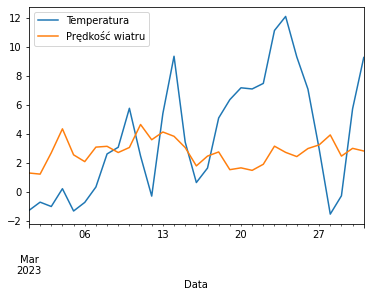

In [12]:
df_pogoda_srednia.plot(y=["Temperatura", "Prędkość wiatru"], use_index=True)
plt.show()